# Chapter 8: Advanced Data Analysis
In the last few chapters, we have become comfortable with the idea of building our own functions. These can become quite complex, as we have learned with the construction of the OLS regression in chapter 7. We will continue developing our tool set for working with and managing large sets of data by integrating data from different data sets. We will introduce the multi index to facilitate this process. Among other things, the multi index is useful for including identifiers across time and region or principality. We will also use the multi index to perform a panel regression that controls for level effects between different countries.

## Using a Double Index to Work with Panel Data
In any project, it will not be uncommon for data to be attached to more than one indentifying category. Often, data will be labeled by polity and by date. In the next several examples, we will work with multiple data sets of this sort, working to combine different data sets, investigate the features of the double index, and use this data in a panel regression that can control for effects by polity and by time period.

### Plotting with Double Index
We will be working with two datasets in the next example: the [Fraser Economic Freedom Index](https://www.fraserinstitute.org/economic-freedom/dataset?geozone=world&page=dataset&min-year=2&max-year=0&filter=0&year=2017) and GDP from the [Maddison Project](https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-project-database-2018).

Due to the formatting of the Fraser Economic Freedom Index, the first column and the first three rows of data in the sheet titled “EFW Index 2018 Report” are blank. We will account for this when importing the data with pandas. Both should be saved in the same folder as the script below.

First, import the GDP data from Maddison Project:

In [1]:
#multiIndex.py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# index_col = [0,2] will select  countrycode as the primary index and year as 
# the secondary index
data = pd.read_excel("mpd2018.xlsx", 
                     sheet_name = "Full data", 
                     index_col = [0,2])

View the new dataframe by entering data in the console:

In [2]:
data

country  cgdppc  rgdpnapc      pop         i_cig i_bm
countrycode year                                                           
AFG         1820  Afghanistan     NaN       NaN   3280.0           NaN  NaN
            1870  Afghanistan     NaN       NaN   4207.0           NaN  NaN
            1913  Afghanistan     NaN       NaN   5730.0           NaN  NaN
            1950  Afghanistan  2392.0    2392.0   8150.0  Extrapolated  NaN
            1951  Afghanistan  2422.0    2422.0   8284.0  Extrapolated  NaN
...                       ...     ...       ...      ...           ...  ...
ZWE         2012     Zimbabwe  1623.0    1604.0  12620.0  Extrapolated  NaN
            2013     Zimbabwe  1801.0    1604.0  13183.0  Extrapolated  NaN
            2014     Zimbabwe  1797.0    1594.0  13772.0  Extrapolated  NaN
            2015     Zimbabwe  1759.0    1560.0  14230.0  Extrapolated  NaN
            2016     Zimbabwe  1729.0    1534.0  14547.0  Extrapolated  NaN

[19873 rows x 6 columns]

When working with a multi index, calling the values from a single index requires a few steps. If you were to call data.index in the console, both the countrycode and the year values would be returned:

In [3]:
data.index

MultiIndex([('AFG', 1820),
            ('AFG', 1870),
            ('AFG', 1913),
            ('AFG', 1950),
            ('AFG', 1951),
            ('AFG', 1952),
            ('AFG', 1953),
            ('AFG', 1954),
            ('AFG', 1955),
            ('AFG', 1956),
            ...
            ('ZWE', 2007),
            ('ZWE', 2008),
            ('ZWE', 2009),
            ('ZWE', 2010),
            ('ZWE', 2011),
            ('ZWE', 2012),
            ('ZWE', 2013),
            ('ZWE', 2014),
            ('ZWE', 2015),
            ('ZWE', 2016)],
           names=['countrycode', 'year'], length=19873)

To call only the year values from the multi index, we use the dataframe method, *.get_level_values(“year”)*. This returns the same list, but with only years:

In [4]:
data.index.get_level_values("year")

Int64Index([1820, 1870, 1913, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=19873)

Since we don’t need to hold every repeated year value, only the full range years present in the data set. We will remove an repeated values from the list and then ensure that the list is in order:

In [5]:
#multiIndex.py
# . . . 
# to gather all of the years, we group observations by year, 
# which will remove the other column of the multiindex 
years = data.groupby("year").mean().index

Once you understand the structure of the index, you may find it easier to call all of the commands in one line:

In [6]:
years

Int64Index([   1,  730, 1000, 1150, 1280, 1281, 1282, 1283, 1284, 1285,
            ...
            2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year', length=741)

The data set has relatively few observations for data before the modern era. Before 1800, even for the years that have entries, data for most countries is not present.

Next, we create a dictionary with tuples containing codes for each pair of countries whose real GDP per capita we will compare. The first pair is Canada and Finland, the second pair is France and Germany, and the third pair is Great Britain and the Netherlands. The first country in each pair will be represented by the linestyle *“-”* and the second pair by the linestyle *“--”*.

In [7]:
#multiIndex.py
# . . . 
# pairs of countries to compare in plots
pairs = [("CAN", "FIN"), ("FRA", "DEU"), ("USA","GBR", "ESP", "MEX")]
linestyles = ["-", ":","--","-."]

 Now that the dictionary has been prepared, cycle through each pair of countries in the dictionary. Using a for loop, we select one  of these at a time with an accompanying linestyle. The code of the country calls the Real GDP data using the command *data.ix[(country),:]["cgdppc"]*. This selects data by index according to country and includes all years, as is indicated by the colon in the second part of the index entry. Last, the column *“cgdppc”* is selected. Conveniently, we can also use the code stored in country as the label.
 
Script in lines 27-30 continue to adjust the plot. The command *plt.xlim(xmin, xmax)* selects the range of the x-axis. Only data from 1825 to the most recent observation, identified by *max(years)*, is included in the plot. The *plt.rcParams.update()* commands adjust fontsizes by accessing default parameter in matplotlib. Finally, the create a title that uses latex text by including “$text$”. This italicizes the title text and allows for the use latex commands such as subscripting, greek letters, etc....

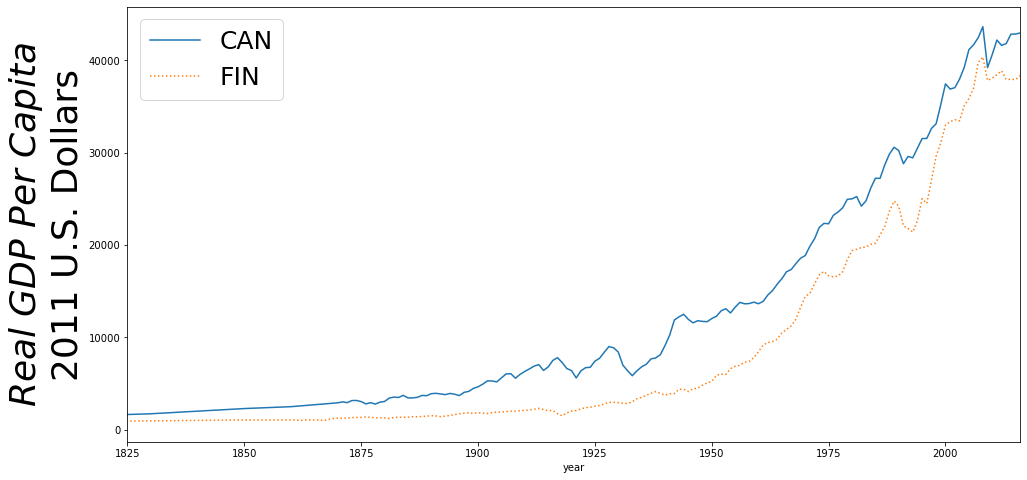

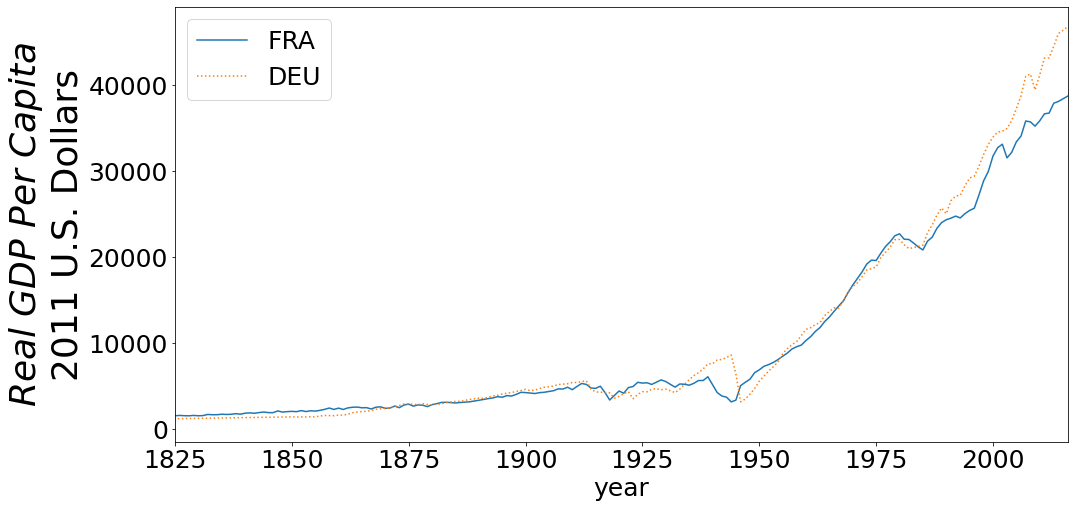

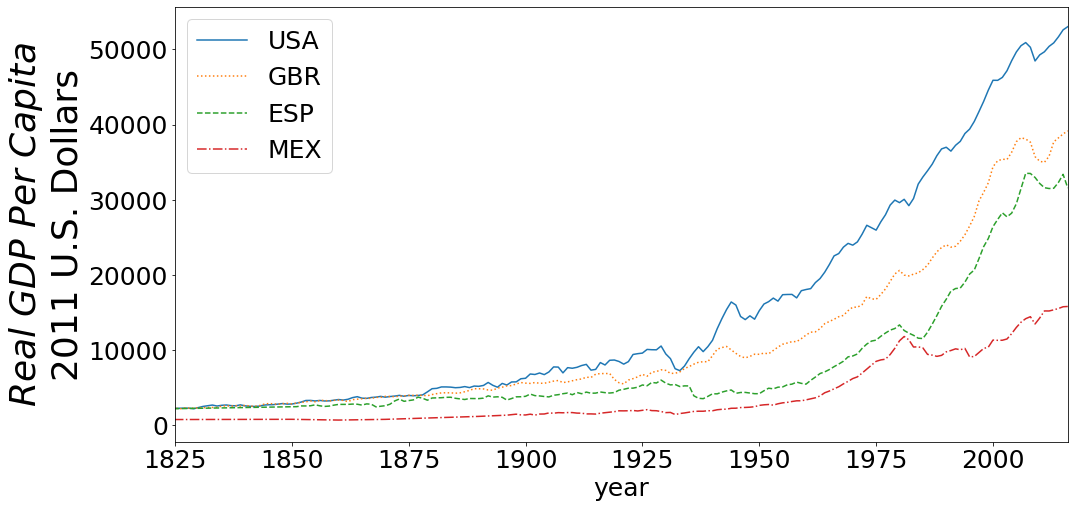

In [8]:
#multiIndex.py
# . . .
  
for pair in pairs:  
    fig, ax = plt.subplots(figsize=(16,8))  
    for i in range(len(pair)):  
        country = pair[i]  
        linestyle = linestyles[i]  
        data.loc[country,:]["cgdppc"].dropna(
        ).plot.line(ax = ax,  
               label = country, linestyle = linestyle)  
    plt.xlim([1825, max(years)])
    plt.rcParams.update({"legend.fontsize": 25, "legend.handlelength": 2})  
    plt.rcParams.update({"font.size": 25})  
    plt.ylabel(
        "$Real$ $GDP$ $Per$ $Capita$\n2011 U.S. Dollars",
        fontsize=36)  
    plt.legend()  
    plt.show()  
    plt.close()  

### Merge Data Sets with Double Index
Next, we will import both sets of data as unique objects with the intention of combining them. First, we must successful import the Fraser Index. Unlike with other files we have imported, the column names are in the third row and the years are in the second column. Finally, we will call the *.dropna()* method twice to drop any row *(axis = 0)* and then any column *(axis=1)* with missing observations:

In [9]:
#dataForPanel.py  
import pandas as pd  
 
#make sure dates are imported in the same format; to do this,  
#we turned off parse_dates  
fraser_data = pd.read_csv("cleanedEconFreedomData.csv",  
                           index_col = [0, 1], parse_dates=False)  
# drop any empty column and any empty row  
fraser_data = fraser_data.dropna(
    axis=0, thresh=1).dropna(axis=1, thresh=1)  
  
maddison_data = pd.read_excel("mpd2018.xlsx", sheet_name = "Full data",   
                              index_col = [0,2])#, parse_dates = True)  


The object fraserData is imported from the sheet #“EFW Index 2018 Report”#. The 1st and 0th columns are used as index columns in that order, respectively. The object maddisonData is imported from the sheet #“Full data”#. The 0th and 2nd columns columns are used as index columns. The double index of both dataframes refers to the #ISO_Code# (#countrycode#) and the year. Since the objects referred to by the indices match, we will be able to use the double index associated with a particular entry to refer to another double index.

Since both dataframes employ the same double index format, we can copy any column from one dataframe to the other. We will copy for the Maddison GDP data to the Fraser Economic Freedom Index data.

In [10]:
#dataForPanel.py
# . . . 
fraser_data["RGDP Per Capita"] = maddison_data["cgdppc"]
fraser_data

EFW  Size of Government  Legal System & Property Rights  \
ISO_Code Year                                                                 
ALB      2017  7.673511            7.528167                        5.064907   
         2016  7.637742            7.875862                        5.071814   
         2015  7.639666            7.904257                        5.003489   
         2014  7.586769            7.882037                        4.666740   
         2013  7.389525            7.807904                        4.543782   
...                 ...                 ...                             ...   
ZWE      2000  4.299839            5.365058                        4.662445   
         1995  5.518614            6.418859                        5.138131   
         1990  4.516140            5.108843                        3.439437   
         1985  4.226841            5.026250                        2.633492   
         1980  4.054740            6.322625                        1.379602   

               Sound Money  Freedom to trade internationally  Regulation  \
ISO_Code Year                                                              
ALB      2017     9.648271                          8.343863    7.782349   
         2016     9.553657                          8.214900    7.472476   
         2015     9.585625                          8.109118    7.595838   
         2014     9.629320                          8.208630    7.547119   
         2013     9.690942                          7.705771    7.199224   
...                    ...                               ...         ...   
ZWE      2000     2.891166                          3.224735    5.355792   
         1995     4.915293                          5.839664    5.423290   
         1990     5.664840                          4.689623    3.953668   
         1985     6.305850                          3.161743    4.207229   
         1980     6.343342                          3.277015    3.280637   

               RGDP Per Capita  
ISO_Code Year                   
ALB      2017              NaN  
         2016          11285.0  
         2015          10947.0  
         2014          10703.0  
         2013          10138.0  
...                        ...  
ZWE      2000           2696.0  
         1995           2841.0  
         1990           3265.0  
         1985           3615.0  
         1980           4003.0  

[3030 rows x 7 columns]

Now that the dataset has been transferred, we can save the result as a csv so that we can call it again in later examples. RGDP Per Capita is shown in the last column of the new csv file:

In [11]:
fraser_data.to_csv("fraserDataWithRGDPPC.csv")

### Creating Indicator Variables
Suppose that we wanted to test the idea that geography influences economic growth. We would need to clarify a hypothesis concerning this. We might believe, for example, that countries in North America tend to have a distinct real gross domestic product than in other continents i.e., real GDP tends to be higher or lower due to residing in North America. To represent this, we would create an indicator variable named *“North America”*. Countries residing in North America would be indicated with a  1 (i.e., True), and those outside of North America would receive a zero.

To accomplish this task is straightforward if you know the appropriate commands to use. As usual, we import the data. Before creating an indicator variable, you will need to choose the name that will reference the indicator variable, indicator_name, and make a list of the index values, *target_index_list* that will be recorded as possessing the attribute referred to by the indicator variable. Finally, you will need to choose the name of the index column that includes the elements in the *target_index_list*. If you are not sure what this name is, you can check the names of the index columns using *df.index.names*.

In [12]:
#indicatorVariable.py
import pandas as pd  
  
def create_indicator_variable(data, indicator_name, 
                              index_name, target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# Import data with "ISO_Code" and "Year" as index columns  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
  
# select "ISO_Code" from names of double index  
index_name = data.index.names[0]  
indicator_name = "North America"  
# Cuba, Grenada, Saint Kitts, Saint Lucia, Saint Vincent are missing   
# from Fraser Data  
countries_in_north_america = [
    "BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",
    "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",
    "TTO", "USA"]  
create_indicator_variable(data = data, 
    indicator_name = indicator_name,  
    index_name = index_name, 
    target_index_list = countries_in_north_america)

Once the new column of data has been creative, it can be called by passing indicator¬¬_name to the dataframe. Be sure to use double brackets (i.e., *[[ , ]]*) so that the column names are included in the output. 

In [13]:
data[["North America"]]

North America
ISO_Code Year                     
ALB      2017-01-01              0
         2016-01-01              0
         2015-01-01              0
         2014-01-01              0
         2013-01-01              0
...                            ...
ZWE      2000-01-01              0
         1995-01-01              0
         1990-01-01              0
         1985-01-01              0
         1980-01-01              0

[3030 rows x 1 columns]

It is useful to represent discrete variabls, like the indicator variable for "North America", by color in a scatter plot. If there is a difference means between two groups, it is often apparrent when data is visualized by color. In the case of the "North America" indicator variable, the difference in means between the groups does not appear to be causal (statistically significant), as we will show later in the chapter.

We use  "North America" as the variable indicating color in the scatter plot. 

Text(0.5, 1.0, '2000')

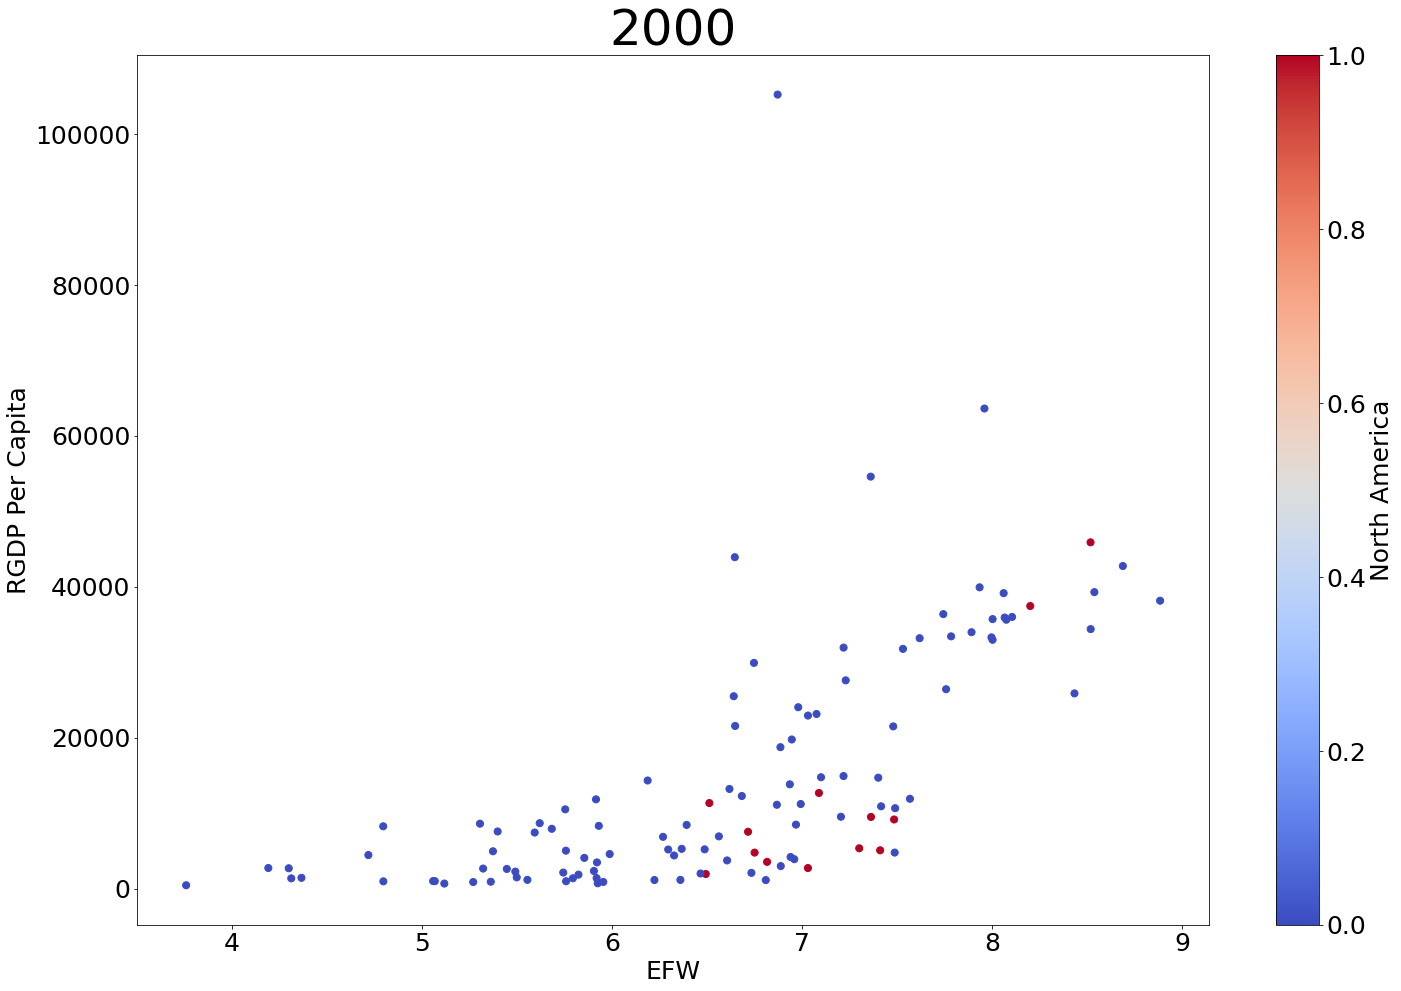

In [14]:
import datetime
year = 2000

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = "coolwarm", ax = ax, s = 50)
ax.set_title(str(year), fontsize = 50)

[0.  0.2 0.4 0.6 0.8 1. ]


<ipython-input-15-4258e0dae734>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])


Text(0.5, 1.0, '2000')

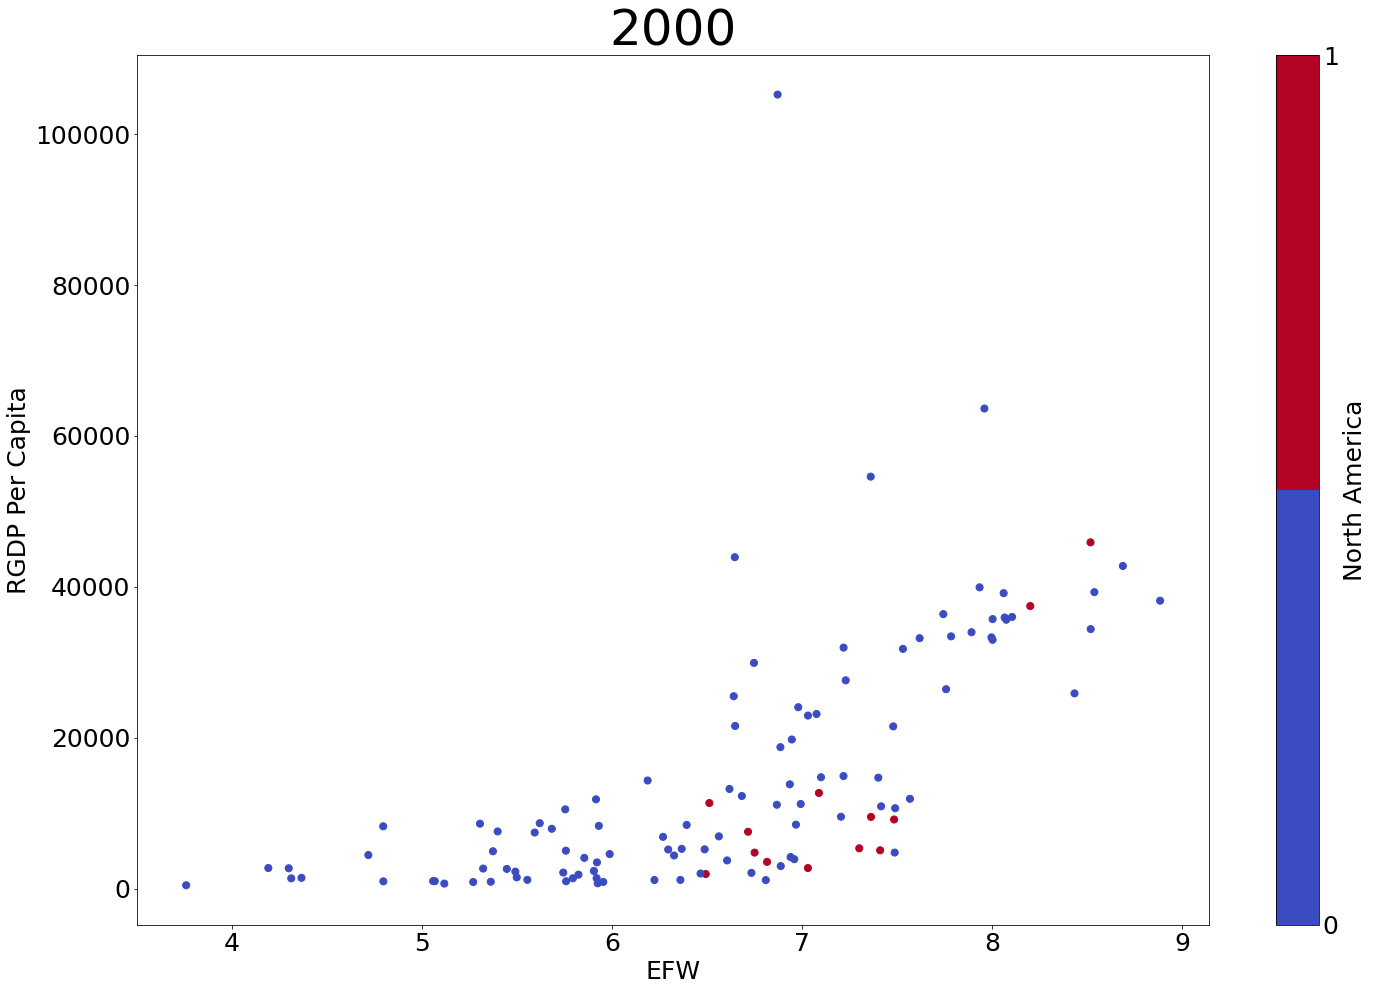

In [15]:
import datetime
from matplotlib import cm

year = 2000
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('coolwarm', 2)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", c = "North America",
                      cmap = cmap, ax = ax, norm = norm, s = 50)

# to remove numbers between 0 and 1, access the color axis through plt.gcf()
f = plt.gcf()
cax  = f.get_axes()[1]
# access colorbar values
vals = cax.get_yticks()
print(vals)
# only include 0 or 1
cax.set_yticklabels([int(val) if val % 1 == 0 else "" for val in vals ])
# remove tick lines from color axis
cax.tick_params(length = 0)

ax.set_title(str(year), fontsize = 50)

### Create Quantile Ranking
Similar to the pervious exercise, we may categorize data according ranked bins. This is accomplished by separating data into quantiles, often in the form of quartiles or quintiles, however this can be accomplished using any number of divisions. The following script allows you to create quantiles of the number of divisions of your choosing.

First, we need to import the data that we have merged. Once the dataframe is created, we must prepare a place for quantile data to be registered. Out of convenience, we will refer to the n-tile, meaning that a quartile will be labeled a “4-tile”, a quintile will be label a “5-tile”, and so forth. Before recording the data, we will create blank entries using *np.nan*.

In [16]:
#quantile.py  
import pandas as pd  
import numpy as np  

# choose numbers of divisions  
n = 5  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", 
                   index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
#create column identifying n-tile rank  
quantile_var = "RGDP Per Capita"  
quantile_name = quantile_var + " " + str(n) + "-tile"  
data[quantile_name] = np.nan

Now that the dataframe has been prepped, we can create function that will record quantile values. Since the data frame includes data for nearly every country over many years, we will want to choose one of the index categories to identify quantiles. We prefer to compare countries,  8so unique quantile measures will compare countries in a given year. We will build a list of years and use a for-loop to cycle through values in the list. For each year, we will construct a quantile values comparing countries within the year.

The *create_quantile()* function needs to be provided the number of divisions within a quantile (*n*), the dataframe (*data*), the year to which the quantile measure refers (*year*), the variable for which the quantile is constructed (*quantile_var*), and the key that will refer to the quantile data (*quantile_name*).

First, we construct the year_index. This provides a slice of the original index that includes only the years of interest. Next, we identify the value that divides each quantile. The pandas dataframe has a convenient command, *df.quantile(percent)*, that will calculate the value  for a particular percentile. For example, *df.quantile(.25)* will calculate the value representing the 25th percentile. A quantile is comprised of divisions whose size is a fraction of 1 and that sum to one. The value that divides each quantile is defined by *i/n*  where *n* is the number of quartiles, and 
*i* includes all integers from 1 up to and including *n*.

Now that the values dividing each quantile for a given year have been identified, we can check which in which quantile each country falls. Cycle through the index for the year with for index in *data[year_index].index*. This allows us to calls up each individual countries data for the given year, compare that data of the category of interest to the quantile values, and select the identify quantile that the nation falls in for the year.

In [17]:
#quantile.py  
import pandas as pd  
import numpy as np  
  
def create_quantile(n, data, year, quantile_var, quantile_name):  
    # index that indentifies countries for a given year  
    year_index = data.index.get_level_values("Year") == year  
    quantile_values_dict = {i:data[year_index][quantile_var]\
                            .quantile(i/n) for i in range(1, n + 1)}  
    # cycle through each country for a given year  
    for index in data[year_index].index:  
        # identtify value of the variable of interest  
        val = data.loc[index][quantile_var]  
        # compare that value to the values that divide each quantile  
        for i in range(1, n + 1):  
            # if the value is less than the highest in the quantile identified,  
            # save quantile as i  
            if val <= quantile_values_dict[i]:  
                data.loc[index,[quantile_name]]=int((n + 1) - i)  
                #exit loop  
                break  
            # otherwise check the higest value of the next quantile  
            else:  
                 continue  

# . . .
years = data.groupby("Year").mean().index
for year in years:
    create_quantile(n, data, year, quantile_var, quantile_name)

Now call "RGDP Per Capita" alongside the quantile rankings.

In [18]:
data[["RGDP Per Capita", "RGDP Per Capita 5-tile"]]

RGDP Per Capita  RGDP Per Capita 5-tile
ISO_Code Year                                               
ALB      2017-01-01              NaN                     NaN
         2016-01-01          11285.0                     3.0
         2015-01-01          10947.0                     3.0
         2014-01-01          10703.0                     3.0
         2013-01-01          10138.0                     3.0
...                              ...                     ...
ZWE      2000-01-01           2696.0                     4.0
         1995-01-01           2841.0                     4.0
         1990-01-01           3265.0                     4.0
         1985-01-01           3615.0                     4.0
         1980-01-01           4003.0                     4.0

[3030 rows x 2 columns]

Again, let's identify each quantile by color. We will use code slightly different from the last time. Since the values cover a greater range, all we need to  do is shift the min and max values of the color axis.

C:\Users\JLCat\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1041: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  scatter = ax.scatter(


Text(0.5, 1.0, 'Year: 2016')

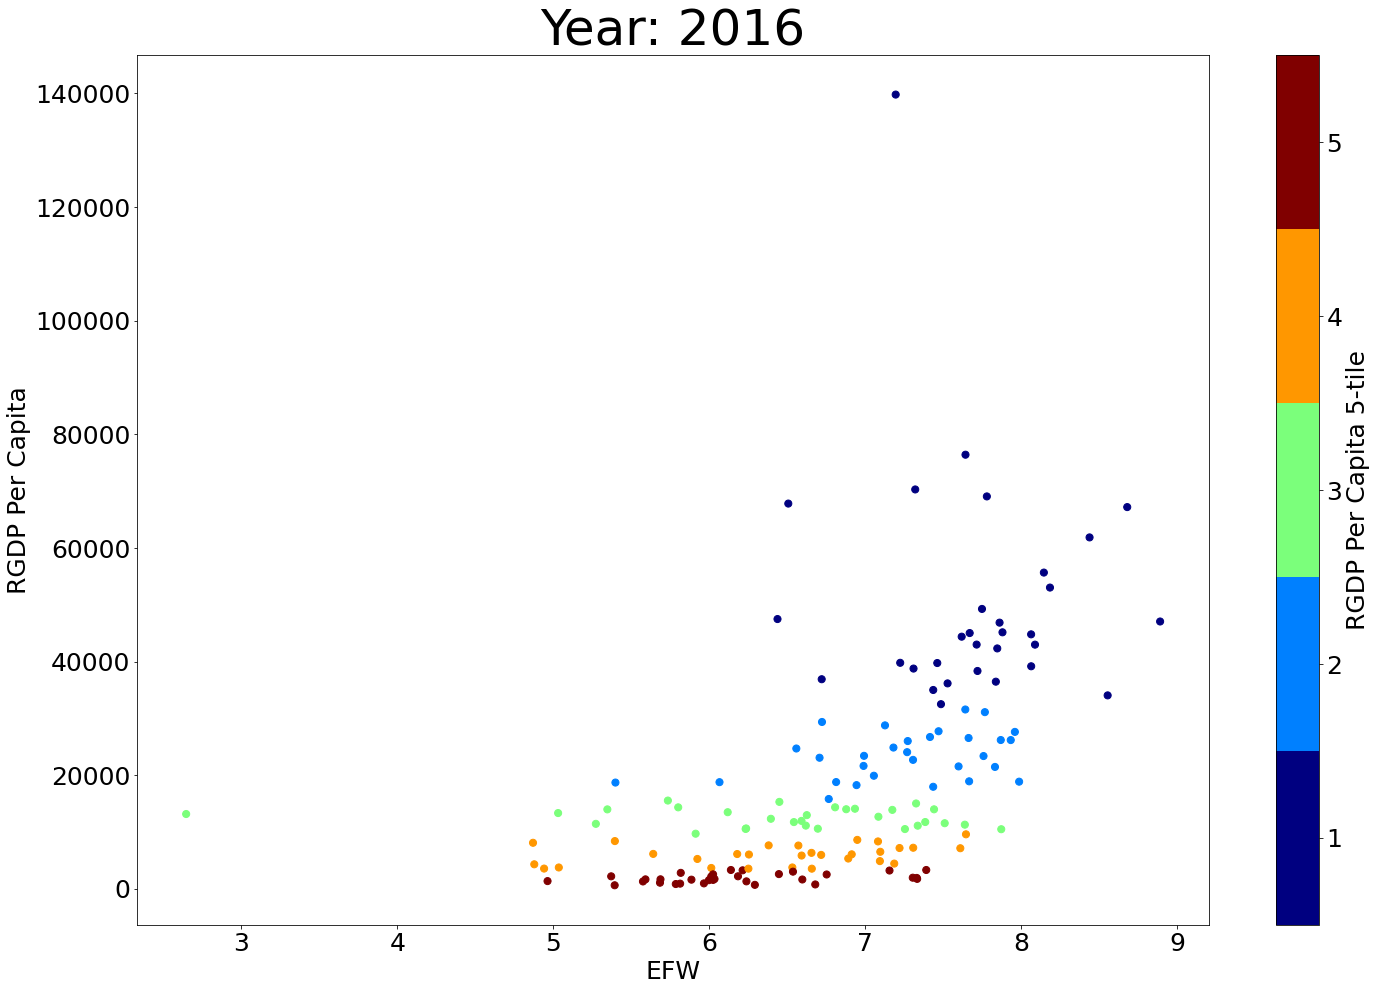

In [19]:
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

year = 2016
plot_data = data[data.index.get_level_values("Year")== datetime.datetime(year,1,1)]
fig, ax = plt.subplots(figsize = (24, 16))
# change colors, divide into 4 distinct colors
norm = cm.colors.Normalize()
cmap = cm.get_cmap('jet', n)
plt.cm.ScalarMappable(cmap=cmap, norm=norm)

# set vmin to 0.5 to slight shift scale, otherwise quintile 
# measures will be on border between colors and 1 and 2 will be 
# indicated in lightblue
plot_data.plot.scatter(x = "EFW", y = "RGDP Per Capita", 
                       c = "RGDP Per Capita " + str(n) + "-tile",
                      cmap = cmap, norm = norm,  ax = ax, s = 50,
                      legend = False, vmin = 0.5, vmax = 5.5)
ax.set_title("Year: " + str(year), fontsize = 50)

### Lag Variables and Differenced Log Values

With time series data, it is often useful to control for trends when data is autocorrelated. Consider, for example, that real GDP data is often highly correlated with values from the previous period. We might detect a false causal relationship between two variables that are actually unrelated but follow a similar trend. For example, we might regress your age against real GDP and find that there is a strong correlation between the two. To avaoid false positives like this, it is useful to account for the influence of lagged values and/or to detrend the data all together by using differenced logs.

Creating lag variables is quite simple if the index is already recognized as containing dates and times. The method, *df.shift(n)* accomplishes this. Pass a negative value to create a lagged variable from n periods previous and a positive value to create a variable that refers to data n periods in the future.

Because we are using a double index, we must specify to which index we must instruct Pandas as to which index the shift refers. We accomplish this by using *.groupby(level)* to target the index column that does not refer to a datetime data. This will group the data by entity, thus leaving only the date column to be referenced by *.shift(n)*. Since we only want a lag value from the period that immediately preceded the observation, *n=-1*.

In [20]:
#logAndDifferenceData.py  
import pandas as pd  
import numpy as np  
import datetime  
  
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)


To understand what the command yielded, we will want to view data for an individual country. The following command will save *“RGDP Per Capita”* in the United States and the lag of that value to a csv file:

In [21]:
data.loc["USA", :]

,EFW,Size of Government,Legal System & Property Rights,Sound Money,Freedom to trade internationally,Regulation,RGDP Per Capita,RGDP Per Capita Lag
Year,,,,,,,,
2017-01-01,8.196365,7.157599,7.436473,9.799038,7.674580,8.914133,NaN,53015.0
2016-01-01,8.183442,7.138582,7.396209,9.847874,7.653328,8.881217,53015.0,52591.0
2015-01-01,8.085664,7.121655,7.226306,9.761051,7.535949,8.783357,52591.0,51664.0
2014-01-01,7.969703,7.126057,7.099625,9.389649,7.573566,8.659619,51664.0,50863.0
2013-01-01,7.900998,7.097752,6.974508,9.420297,7.374713,8.637721,50863.0,50394.0
2012-01-01,8.012288,7.565472,7.016540,9.323542,7.699527,8.456360,50394.0,49675.0
2011-01-01,7.906265,7.260760,6.957723,9.305630,7.711284,8.295927,49675.0,49267.0
2010-01-01,7.972577,7.108888,7.143095,9.678239,7.720760,8.211905,49267.0,48453.0
2009-01-01,7.965853,7.147290,7.188374,9.604751,7.723552,8.165299,48453.0,50276.0


Since not every year is included in the index, this actually results in false values for periods where observations are only available once every 5 years. If we use lagged values, we need to delimit the data to consecutive annual observations. Since consistent data is provided starting in the year 2000. To select data by year, we need to inicate that we wish to form selection criteria that refers to values form the year column in the index. The command *data.index.get_level_Values(“Year”)* calls these values. Once we execute the above script, we can call this command in the console.

In [22]:
data.index.get_level_values("Year")

DatetimeIndex(['2017-01-01', '2016-01-01', '2015-01-01', '2014-01-01',
               '2013-01-01', '2012-01-01', '2011-01-01', '2010-01-01',
               '2009-01-01', '2008-01-01',
               ...
               '2005-01-01', '2004-01-01', '2003-01-01', '2002-01-01',
               '2001-01-01', '2000-01-01', '1995-01-01', '1990-01-01',
               '1985-01-01', '1980-01-01'],
              dtype='datetime64[ns]', name='Year', length=3030, freq=None)

If we compare these values to the critierion specified, a column of boolean values will be generated that identifies where values from the index meet the specified criterion.

In [23]:
data.index.get_level_values("Year") >= datetime.datetime(1999, 1, 1)

array([ True,  True,  True, ..., False, False, False])

If we pass the command, *data.index.get_level_values("Year") > datetime.datetime(1999,1,1)*, to the dataframe, only observations that meet the criterion indicated will be included. In this case, any observation generated in years after 1999 will be included.

In [24]:
#logAndDifferenceData.py
# . . .
data = data[data.index.get_level_values("Year") > datetime.datetime(1999,1,1)]

Call *data* in the console to see that the range of dates included has narrowed, thereby removing the observations separated by 5 year intervals:

In [25]:
data

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  
ISO_Code Year                                              
ALB      2017-01-01              NaN              11285.0  
         2016-01-01          11285.0              10947.0  
         2015-01-01          10947.0              10703.0  
         2014-01-01          10703.0              10138.0  
         2013-01-01          10138.0              10344.0  
...                              ...                  ...  
ZWE      2004-01-01           1813.0               1958.0  
         2003-01-01           1958.0               2376.0  
         2002-01-01           2376.0               2624.0  
         2001-01-01           2624.0               2696.0  
         2000-01-01           2696.0               2841.0  

[2589 rows x 8 columns]

The earliest dates included nowonly reach as far back as the year 2001. 

Now that we’ve delimited the data, let’s perform some other transformation that will help to prepare the data for a regression. It will be useful to log GDP values as the rate of growth of GDP measured in raw units tends to increase over time. By logging data, beta estimates will approximate the cross elasticity of the endogenous variable y with respect to a change in an exogenous variable x.

Since we have already created a lagged measure of real GDP, this is a good opportunitiy to use a for loop. We only want to log values referred to be a key that includes the string *“GDP”*. We check each key for inclusion of this term. If the term is included in the key, than we add a logged version of the variable. 


In [26]:
#logAndDifferenceData.py
# . . . 
for key in data:
    if "GDP" in key:
        data["Log " + key] = np.log(data[key])

The data is almost prepared. We have only left to create data that has been diferenced. Differenced log values approximate the rate of change of a variable. Likewise, we can difference the index values to test for the effect of an improvement in a nation’s economic freedom score on the rate of GDP growth.

To difference data with a multi index, we must first organize the data so that observations are presented sequentially by entity. This uses the same command, .groupby(), that we used earlier to create a lag value. The result this time is that a new dataframe is created by taking the differenced values of all variables in the dataframe. 

We save the new results in a dictionary that holds both the original dataframe and the new dataframe with differenced data. 

Since it does not make sense to difference an indicator variable, we will reset the value of North America to 1.

In [27]:
#logAndDifferenceData.py
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
data_dict["Diff Data"] = data.groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

Now let's check the data that we saved as data_dict["Diff Data"]

In [28]:
data_dict["Data"]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2017-01-01  7.673511            7.528167   
         2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
...                       ...                 ...   
ZWE      2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   
         2001-01-01  3.633489            5.547411   
         2000-01-01  4.299839            5.365058   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2017-01-01                        5.064907     9.648271   
         2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
...                                             ...          ...   
ZWE      2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   
         2001-01-01                        3.311100     1.702366   
         2000-01-01                        4.662445     2.891166   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2017-01-01                          8.343863    7.782349   
         2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
...                                               ...         ...   
ZWE      2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   
         2001-01-01                          3.184783    4.421784   
         2000-01-01                          3.224735    5.355792   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2017-01-01              NaN              11285.0   
         2016-01-01          11285.0              10947.0   
         2015-01-01          10947.0              10703.0   
         2014-01-01          10703.0              10138.0   
         2013-01-01          10138.0              10344.0   
...                              ...                  ...   
ZWE      2004-01-01           1813.0               1958.0   
         2003-01-01           1958.0               2376.0   
         2002-01-01           2376.0               2624.0   
         2001-01-01           2624.0               2696.0   
         2000-01-01           2696.0               2841.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  
ISO_Code Year                                                      
ALB      2017-01-01                  NaN                 9.331230  
         2016-01-01             9.331230                 9.300821  
         2015-01-01             9.300821                 9.278279  
         2014-01-01             9.278279                 9.224046  
         2013-01-01             9.224046                 9.244162  
...                                  ...                      ...  
ZWE      2004-01-01             7.502738                 7.579679  
         2003-01-01             7.579679                 7.773174  
         2002-01-01             7.773174                 7.872455  
         20

Notice that there exist no data for the first year of observations. Without a previous year to draw from for the year 1999, the pandas dataframe is left blank for differenced values in this year.

### Using Indicator Variables in Regression
Using the function created above, we can prepare indicator and quantile variables to be used in a regression. As before, the a regression follows the same form as a standard multiple regression with continuous exogenous variables, but also include a parameter, α_k, for each indicator or quantile variables.

$y_i = \beta_0 + \sum_{j=1}^{n} \beta_jx_{j,i} + \sum_{k=1}^{m} \alpha_kx_{k,i} + e_i$

For both cases, we can use the regression method that we created last class. We begin with use of indicator variables in regression. An indicator variable accounts for a level effect that is attributed to a predicted value due to an attribute of the observation. Suppose that we wanted to measure whether or not there is an effect of gender on wages in a particular field once all other relevant factors are accounted for. Observations where the wage earner is a woman would be indicated with a one. The beta value estimated by a regression would indicate the effect of gender on wage given the control variables included in the regression.

We can perform a similar regression by identifying the effect of being a nation in North America on real GDP per capita of countries residing on the continent. In reality, this is actually a poor indicator variable, but we can expand our computational toolbelt by creating an indicator variable that identifies countries in North America and by including this variable in a regression. We will see that the creation of indicator variables is fundamental to the panel regression.

In [29]:
#indicatorAndDiffRegression.py
import pandas as pd  
import numpy as np  
import datetime  
  
def create_indicator_variable(data, indicator_name, index_name,   
                              target_index_list):  
    # Prepare column with name of indicator variable  
    data[indicator_name] = 0  
    # for each index whose name matches an entry in target_index_list  
    # a value of 1 will be recorded  
    for index in target_index_list:  
        data.loc[data.index.get_level_values(\
            index_name) == index, [indicator_name]] = 1  
        
# import data  
data = pd.read_csv("fraserDataWithRGDPPC.csv", index_col = ["ISO_Code", "Year"],   
                   parse_dates = True)  
data["RGDP Per Capita Lag"] = data.groupby(level="ISO_Code")\
    ["RGDP Per Capita"].shift(-1)  
data = data[data.index.get_level_values("Year") > datetime.datetime(2000,1,1)]  
  
for key in data:  
    if "GDP" in key:  
        data["Log " + key] = np.log(data[key])  
# We do not want to difference the index values, only the Real GDP values  
# so initialize the diff data as teh dataframe but only include index values  
# from a differenced matrix (one year of observations will be missing)  
diff_index = data.groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data  
data_dict["Diff Data"] = data.copy().loc[diff_index]  
for key in data:  
    if "GDP" in key:  
        data_dict["Diff Data"][key] = data[key].groupby(level=0).diff(-1)  
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()  
  
# Create indicator variable for North Amierca in both data and diff_data  
indicator_name = "North America"  
index_name = "ISO_Code"  
countries_in_north_america = ["BHS", "BRB", "BLZ", "CAN", "CRI", "DOM", "SLV",  
                              "GTM", "HTI", "HND", "JAM", "MEX", "NIC", "PAN",  
                              "TTO", "USA"]  
for key in data_dict:  
    data = data_dict[key]  
    create_indicator_variable(data = data, indicator_name = indicator_name,  
        index_name = index_name,target_index_list = countries_in_north_america)  

As in the earlier example, we have created indicator variables. Notice that the created are not differenced even in the dataframe with differenced data. We  will be using these values in regressions where the estimated value is either logged or log-differenced. In the first case, the indicator variable will effect the level estimated. In the second case, the indicator variable influences an estimated rate.

We’ve left to estimate regression using data from each dataframe. We will estimate the impact of economic freedom (*“SUMMARY INDEX”*) on Real GDP Per Capita. To control for autocorrelation, we include the lag of Real GDP Per Capita. To run the regression once for each dataframe in data_dict, we use a for loop that cycles through the keys in data_dict. We print the statistics for the estimated beta values as well as statistics that describe the results of the regression overall. The key is also printed to identify each set of results.

In [30]:
data_dict[key]

EFW  Size of Government  \
ISO_Code Year                                       
ALB      2016-01-01  7.637742            7.875862   
         2015-01-01  7.639666            7.904257   
         2014-01-01  7.586769            7.882037   
         2013-01-01  7.389525            7.807904   
         2012-01-01  7.332332            8.096375   
...                       ...                 ...   
ZWE      2006-01-01  3.012548            4.770748   
         2005-01-01  2.889240            4.291101   
         2004-01-01  3.181057            5.184469   
         2003-01-01  3.675260            5.709175   
         2002-01-01  3.625483            5.514469   

                     Legal System & Property Rights  Sound Money  \
ISO_Code Year                                                      
ALB      2016-01-01                        5.071814     9.553657   
         2015-01-01                        5.003489     9.585625   
         2014-01-01                        4.666740     9.629320   
         2013-01-01                        4.543782     9.690942   
         2012-01-01                        4.471492     9.710740   
...                                             ...          ...   
ZWE      2006-01-01                        3.572649     0.000000   
         2005-01-01                        3.487611     0.000000   
         2004-01-01                        3.595709     0.000000   
         2003-01-01                        3.421352     1.250000   
         2002-01-01                        3.405224     1.250000   

                     Freedom to trade internationally  Regulation  \
ISO_Code Year                                                       
ALB      2016-01-01                          8.214900    7.472476   
         2015-01-01                          8.109118    7.595838   
         2014-01-01                          8.208630    7.547119   
         2013-01-01                          7.705771    7.199224   
         2012-01-01                          7.115422    7.267629   
...                                               ...         ...   
ZWE      2006-01-01                          2.299270    4.420073   
         2005-01-01                          2.368615    4.298872   
         2004-01-01                          2.567670    4.557437   
         2003-01-01                          3.120167    4.875605   
         2002-01-01                          3.002611    4.955112   

                     RGDP Per Capita  RGDP Per Capita Lag  \
ISO_Code Year                                               
ALB      2016-01-01            338.0                244.0   
         2015-01-01            244.0                565.0   
         2014-01-01            565.0               -206.0   
         2013-01-01           -206.0                860.0   
         2012-01-01            860.0                160.0   
...                              ...                  ...   
ZWE      2006-01-01            -73.0               -153.0   
         2005-01-01           -153.0               -145.0   
         2004-01-01           -145.0               -418.0   
         2003-01-01           -418.0               -248.0   
         2002-01-01           -248.0                -72.0   

                     Log RGDP Per Capita  Log RGDP Per Capita Lag  \
ISO_Code Year                                                       
ALB      2016-01-01             0.030409                 0.022541   
         2015-01-01             0.022541                 0.054233   
         2014-01-01             0.054233                -0.020116   
         2013-01-01            -0.020116                 0.086800   
         2012-01-01             0.086800                 0.017014   
...                                  ...                      ...   
ZWE      2006-01-01            -0.044972                -0.088165   
         2005-01-01            -0.088165                -0.076941   
         2004-01-01            -0.076941                -0.193495   


In [31]:
#indicatorRegressoin.py
# . . . 
from regression import Regression
# . . . 
# prepare regression variables  
X_names = ["EFW", "Log RGDP Per Capita Lag"]  
y_name = ["Log RGDP Per Capita"]  
  
# save instance of regression class  
reg = Regression()  
for key in data_dict:  
    # call OLS method  
    data = data_dict[key]  
    reg.OLS(reg_name = key, data = data.dropna(),  
            y_name = y_name, beta_names = X_names)  
    print(key, reg.estimates, sep = "\n")  
    print(reg.stats_DF)  
    print()  

Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
EFW                         0.007394  0.001976    3.741778  0.00019   
Log RGDP Per Capita Lag     0.991321  0.001529  648.176672  0.00000   
Constant                    0.059154  0.011181    5.290454  0.00000   

                        signficance  
y = Log RGDP Per Capita              
EFW                             ***  
Log RGDP Per Capita Lag         ***  
Constant                        ***  
           Estimation Statistics
r**2                    0.997218
Adj. r**2               0.997215
f-stat             384607.676314
Est Var                 0.004273
MSE                     0.065371
SSE                     9.170525
SSR                  3287.096317
SST                  3296.266842
Obs.                 2149.000000
DOF                  2146.000000

Diff Data
                         Coefficient        SE     t-stat  p-value signfica

We can check if the indicator variable, *“North America”*, adds any explanatory value by adding the variable to this regression. Only line 43 is changed by this addition.

In [32]:
# . . .
X_names = ["EFW", "Log RGDP Per Capita Lag", "North America"]
# . . .
for key in data_dict:  
    # call OLS method  
    data = data_dict[key]  
    reg.OLS(reg_name = key, data = data.dropna(),  
            y_name = y_name, beta_names = X_names)  
    print(key, reg.estimates, sep = "\n")  
    print(reg.stats_DF)  
    print()

Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
EFW                         0.008143  0.002012    4.047557  0.00005   
Log RGDP Per Capita Lag     0.990974  0.001539  644.034057  0.00000   
North America              -0.009475  0.004856   -1.951148  0.05117   
Constant                    0.058156  0.011186    5.199203  0.00000   

                        signficance  
y = Log RGDP Per Capita              
EFW                             ***  
Log RGDP Per Capita Lag         ***  
North America                        
Constant                        ***  
           Estimation Statistics
r**2                    0.997223
Adj. r**2               0.997219
f-stat             256741.765544
Est Var                 0.004268
MSE                     0.065328
SSE                     9.154278
SSR                  3287.112564
SST                  3296.266842
Obs.                 2149.000000
DOF       

Neither of regression yield an estimate for the indicator variable that is 1) statistically significant or 2) that significantly improves the goodness-of-fit (r\*\*2). In fact, the f-statistic and adjusted r-squared values have both fallen for the second set of regressions. It appears that inclusion of a control for North American countries does not improve the regression. 

### Panel Regression
The indicator variable plays a key role in a very popular regression within economics: the panel (or fixed effects) regression. A panel regression is an OLS regression that includes an indicator variable for certain fixed attributes. Conventiently, the panel regression is often used to control for effects between different political units – i.e., cities, states, nations, etc.... Using the data from the previous examples, we will run a panel regression with fixed effects for each nation. We regress the data over time, holding constant a level effect provided by the unique indicator variable associated with each nation. The indicator variables that drive results in the panel regression adjust the y-intercept indicated by the constant β0 with a unique adjustment for each state.

We can accommodate a Panel Regression by making a few additions and edits to the *regress()* method that we have already built. The first step for creating a panel regression will be to add the *create_indicator_variable()* function that we created earlier. Be sure to add self to the terms that are passed to this method within the *Regression* class.

For convenience, the entire Regression class is included with an additional

In [33]:
#regression.py  
# you may ignore import jdc, used to split class development
# other cells that edits a class will include the magic command %% add_to
import jdc
import pandas as pd
import numpy as np
import copy
# make sure to import sys, as we will use this in the next step 
import sys
import stats
from scipy.stats import t, f  

class Regression:
    
    def __init__(self):  
        self.reg_history = {}  

    def OLS(self, reg_name, data, y_name, beta_names, min_val = 0,  
                max_val = None, constant = True):  
        self.min_val = min_val  
        if max_val != None:  
            self.max_val = max_val  
        else:  
            self.max_val = len(data)  
        self.reg_name = reg_name  
        self.y_name = y_name  
        self.beta_names = copy.copy(beta_names)
        self.data = data.copy()  
        if constant:  
            self.add_constant()  
        self.build_matrices()
        self.estimate_betas_and_yhat()
        self.calculate_regression_stats()
        self.save_output()
        
    def calculate_regression_stats(self):  
        self.sum_square_stats()  
        self.calculate_degrees_of_freedom()  
        self.calculate_estimator_variance()  
        self.calculate_covariance_matrix()  
        self.calculate_t_p_error_stats()  
        self.calculate_root_MSE()  
        self.calculate_rsquared()  
        self.calculate_fstat()  
        self.build_stats_DF()
        
    def add_constant(self):  
        self.data["Constant"] = 1  
        self.beta_names.append("Constant")   

    def build_matrices(self):
        # Transform dataframews to matrices
        self.y = np.matrix(self.data[self.y_name][self.min_val:self.max_val])
        # create a k X n nested list containing vectors for each exogenous var
        self.X = np.matrix(self.data[self.beta_names])
        self.X_transpose = np.matrix(self.X).getT()
        # (X'X)**-1
        X_transp_X = np.matmul(self.X_transpose, self.X)
        self.X_transp_X_inv = X_transp_X.getI()
        # X'y
        self.X_transp_y = np.matmul(self.X_transpose, self.y)

    def estimate_betas_and_yhat(self):
        # betas = (X'X)**-1 * X'y
        self.betas = np.matmul(self.X_transp_X_inv, self.X_transp_y)
        # y_hat = X * betas
        self.y_hat = np.matmul(self.X, self.betas)
        # Create a column that hold y-hat values
        #.item(n) pulls nth value from matrix
        self.data[self.y_name[0] + " estimator"] = \
            [i.item(0) for i in self.y_hat]
        # create a table that holds the estimated coefficient
        # this will also be used to store SEs, t-stats, and p-values
        self.estimates = pd.DataFrame(self.betas, index = self.beta_names,
                                      columns = ["Coefficient"])
        # identify y variable in index
        self.estimates.index.name = "y = " + self.y_name[0]        

    def sum_square_stats(self):  
        ssr_list = []  
        sse_list = []  
        sst_list = []  
        mean_y = stats.mean(self.y).item(0)  
        for i in range(len(self.y)):  
            # ssr is sum of squared distances between the estimated y values  
            # (y-hat) and the average of y values (y-bar)  
            yhat_i = self.y_hat[i]  
            y_i = self.y[i]  
            r = yhat_i - mean_y  
            e = y_i - yhat_i  
            t = y_i - mean_y  
            ssr_list.append((r) ** 2)  
            sse_list.append((e) ** 2)  
            sst_list.append((t) ** 2)  

        # call item - call value instead of matrix  
        self.ssr = stats.total(ssr_list).item(0)  
        self.sse = stats.total(sse_list).item(0)  
        self.sst = stats.total(sst_list).item(0)  

    def calculate_degrees_of_freedom(self):  
        # Degrees of freedom compares the number of observations to the number  
        # of exogenous variables used to form the prediction  
        self.lost_degrees_of_freedom = len(self.estimates)  
        self.num_obs = self.max_val + 1 - self.min_val  
        self.degrees_of_freedom = self.num_obs - self.lost_degrees_of_freedom  

    def calculate_estimator_variance(self):  
        # estimator variance is the sse normalized by the degrees of freedom  
        # thus, estimator variance increases as the number of exogenous  
        # variables used in estimation increases(i.e., as degrees of freedom   
        # fall)  
        self.estimator_variance = self.sse / self.degrees_of_freedom  

    def calculate_covariance_matrix(self):  
        # Covariance matrix will be used to estimate standard errors for  
        # each coefficient.  
        # estimator variance * (X'X)**-1  
        self.cov_matrix = float(self.estimator_variance) * self.X_transp_X_inv  
        self.cov_matrix = pd.DataFrame(self.cov_matrix,  
                                       columns = self.beta_names,  
                                       index = self.beta_names)
        
    def calculate_t_p_error_stats(self):
        ratings = [.05, .01, .001]  
        results = self.estimates  
        stat_sig_names = ["SE", "t-stat", "p-value"]  
        # create space in data frame for SE, t, and p  
        for stat_name in stat_sig_names:  
            results[stat_name] = np.nan  
        # generate statistic for each variable  
        for var in self.beta_names:  
            # SE ** 2 of coefficient is found in the diagonal of cov_matrix  
            results.loc[var, "SE"] = self.cov_matrix[var][var] ** (1/2)  

            # t-stat = Coef / SE  
            results.loc[var,"t-stat"] = \
                results.loc[var, "Coefficient"] / results.loc[var, "SE"]  
            # p-values is estimated using a table that transforms t-value in   
            # light of degrees of freedom  
            results.loc[var, "p-value"] = np.round(t.sf(np.abs(results.\
                       loc[var, "t-stat"]), self.degrees_of_freedom + 1) * 2, 5)  
        # values for significances will be blank unless p-values < .05  
        # pandas does not allow np.nan values or default blank strings to   
        # be replaced   
        significance = ["" for i in range(len(self.beta_names))]  
        for i in range(len(self.beta_names)):  
            var = self.beta_names[i]  
            for val in ratings:  
                if results.loc[var]["p-value"] < val:  
                    significance[i] = significance[i]  + "*"  
        results["signficance"] = significance


    def calculate_root_MSE(self):  
        self.root_mse = self.estimator_variance ** (1/2)  
    
    def calculate_rsquared(self):  
        self.r_sq = self.ssr / self.sst
        self.adj_r_sq = 1 - self.sse / self.degrees_of_freedom / (self.sst\
            / (self.num_obs - 1))  

    def calculate_fstat(self):  
        self.f_stat = (self.sst - self.sse) / (self.lost_degrees_of_freedom\
                      - 1) / self.estimator_variance  
        
    def build_stats_DF(self):  
        stats_dict = {"r**2":[self.r_sq],  
                     "Adj. r**2":[self.adj_r_sq],
                     "f-stat":[self.f_stat],   
                     "Est Var":[self.estimator_variance],  
                     "rootMSE":[self.root_mse],  
                     "SSE":[self.sse],  
                     "SSR":[self.ssr],   
                     "SST":[self.sst],  
                     "Obs.":[int(self.num_obs)],   
                     "DOF":[int(self.degrees_of_freedom)]}  
        self.stats_DF = pd.DataFrame(stats_dict)
        self.stats_DF = self.stats_DF.rename(index={0:"Estimation Statistics"})
        self.stats_DF = self.stats_DF.T

    def save_output(self):  
        self.reg_history[self.reg_name] = {"Reg Stats": self.stats_DF.copy(),  
                                        "Estimates": self.estimates.copy(),  
                                        "Cov Matrix":self.cov_matrix.copy(),
                                        "Data":self.data.copy()}
    
    def joint_f_test(self, reg1_name, reg2_name):  
        # identify data for each regression  
        reg1 = self.reg_history[reg1_name]  
        reg2 = self.reg_history[reg2_name]  
        # identify beta estimates for each regression to draw variables  
        reg1_estimates = reg1["Estimates"]          
        reg2_estimates = reg2["Estimates"]  
        # name of y_var is saved as estimates index name  
        reg1_y_name = reg1_estimates.index.name  
        reg2_y_name = reg2_estimates.index.name  
        num_obs1 = reg1["Reg Stats"].loc["Obs."][0]  
        num_obs2 = reg2["Reg Stats"].loc["Obs."][0]  
        # check that the f-stat is measuring restriction, not for diff data sets
        if num_obs1 != num_obs2:   
            self.joint_f_error()  
        if reg1_y_name == reg2_y_name:          
            restr_reg = reg1 if \
                len(reg1_estimates.index) < len(reg2_estimates.index) else reg2 
            unrestr_reg = reg2 if restr_reg is reg1 else reg1  
            restr_var_names = restr_reg["Estimates"].index  
            unrestr_var_names = unrestr_reg["Estimates"].index  
        # identify statistics for each regression  
        restr_reg = restr_reg if False not in \
                [key in unrestr_var_names for key in restr_var_names] else None
        if restr_reg == None:  
            self.joint_f_error()  
        else:  
            sser = restr_reg["Reg Stats"].loc["SSE"][0]  
            sseu = unrestr_reg["Reg Stats"].loc["SSE"][0]  
            dofr = restr_reg["Reg Stats"].loc["DOF"][0]       
            dofu = unrestr_reg["Reg Stats"].loc["DOF"][0]  
            dfn = dofr - dofu  
            dfd = dofu - 1  
            f_stat = ((sser - sseu) / (dfn)) / (sseu / (dfd))  
            f_crit_val = 1 - f.cdf(f_stat,dfn = dfn, dfd = dfd)  
            #make dictionary?  
            f_test_label = "h_0:"  
            for key in unrestr_var_names:  
                if key not in restr_var_names:  
                    f_test_label = f_test_label + str(key) + " == "  
            f_test_label = f_test_label + "0"  
            res_dict = {"f-stat":[f_stat],  
                        "p-value":[f_crit_val],  
                        "dfn":[dfn],  
                        "dfd":[dfd]}  
            res_DF = pd.DataFrame(res_dict)  
            res_DF = res_DF.rename(index={0:""})  
            res_DF = res_DF.T  
            res_DF.index.name = f_test_label  

            return res_DF  

    def joint_f_error(self):  
            print("Regressions not comparable for joint F-test")  
            return None    
        
    def create_indicator_variable(self,data, indicator_name, index_name,   
                                  target_index_list):  
        # Prepare column with name of indicator variable  
        data[indicator_name] = 0  
        # for each index whose name matches an entry in target_index_list  
        # a value of 1 will be recorded  
        for index in target_index_list:  
            data.loc[data.index.get_level_values(\
                index_name) == index, indicator_name] = 1
        
        
        

We will use the *create_indicator_variable()* method to create an indicator variable for every unique id in the index column labeled *“ISO_Codes”*. Each unique ISO Code represents a particular country, thus we will be creating one indicator variable for every country.

Next, we include the script for the panel regression method in its entirety.


In [34]:
%%add_to Regression

def panel_regression(self, reg_name, data, y_name, X_names, min_val = 0,
                     max_val = None, entity = False, time = False, 
                     constant = True):
    self.indicator_lists = {}
    #identify which index column holds dates, which holds entities
    for i in range(len(data.index.levels)):
            if isinstance(data.index.levels[i], pd.DatetimeIndex):
                if time:
                    date_level = i
                    date_index_name = data.index.names[date_level]
                    self.indicator_lists[date_index_name] = list(data.groupby(date_index_name).mean().index)
                    self.indicator_lists[date_index_name].pop()

            else:
                if entity:
                    entity_level = i
                    entity_index_name = data.index.names[entity_level]
                    self.indicator_lists[entity_index_name] = list(data.groupby(entity_index_name).mean().index)
                    self.indicator_lists[entity_index_name].pop()

    self.indicator_names = []
    for index_name, lst in self.indicator_lists.items():
        for indicator in lst:
            self.create_indicator_variable(data, indicator, index_name, 
                                           [indicator])
        self.indicator_names = self.indicator_names + lst
            
    X_and_indicator_names = X_names + self.indicator_names
    self.OLS(reg_name, data = data, y_name = y_name, 
             beta_names = X_and_indicator_names, min_val = min_val,
             max_val = max_val, constant = constant)
    self.X_names = X_names + ["Constant"]
    self.data = self.data[self.X_names]
    self.estimates = self.estimates.loc[self.X_names]


Since the index includes includes both *“Year”* and *“ISO_Code”*, we must select which type of fixed effect the regression will employ. We create the regression to allow for entity or time fixed effects in a single regression. 

Next, the panel_regression() method must determine the index to which it will refer for creating indicator variables. First, we identify which index column houses datetime data, and which houses entity_data by using isinstance(obj, type). Using a for loop, we can check the identity of both index columns. We save their locations as date_level and entity_level. We save the names of these columns as date_index_name and entity_index_name.

Once the type of each column has been determined, save the name of the desired index name. We can create indicator variables for each state (or time period if that is preferred) using the create_indicator_variable() method. Before , extract the list of entities names, reduce them to the unique set, transform the set into a list, and sort the list. Remove the last indicator in indicators by using .pop(). The nation missing an indicator variable will implicitly depend upon $\beta_0$. This value will serve as the anchor for the underlying regression that the indicator variables marginally shift for each state. Next, cycle through the list of indicators to create an indicator variable for each entity. We save the names of the indicator variables with the variables in *X_names* as *X_and_indicator_names* so that they can be referenced in the regression.

All that is left is to run the regression. The key here is to include the names of the indicator variables in the regression but not include them in the results. To do this, we set self.X_names to include the names passed to panel_regression() and "Constant". The dataframe owned by the Regression class, data, is saved as to only include the variables indicated in *self.X_names*. Likewise, the estimated beta values for the indicator variables are removed by passing *self.X_names* to the index of self.estimates.

Finally, create a script modeled from indicatorRegression.py. We’ve removed any elements relating to the indicator variables from the previous script and saved the result as panelRegression.py. You may find copying this script manually to be easier than marginally editing the previous script. Note that we have removed “North America” from X_names and that OLS() has been replaced by panel_regression().

In [35]:
#panelRegression.py
# . . . .
X_names = ["EFW", "Log RGDP Per Capita Lag"]
y_name = ["Log RGDP Per Capita"]

#save instance of regression class    
reg = Regression()
for key, data in data_dict.items():
    panel_name = key + " panel"
    # call panel_regression method        
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time =True )
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF) 

<ipython-input-33-edf74d3628ff>:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name] = 0
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Data
                         Coefficient        SE     t-stat  p-value signficance
y = Log RGDP Per Capita                                                       
EFW                         0.032374  0.004809   6.732322      0.0         ***
Log RGDP Per Capita Lag     0.869158  0.008741  99.438085      0.0         ***
Constant                    0.814174  0.068832  11.828481      0.0         ***
           Estimation Statistics
r**2                    0.998211
Adj. r**2               0.998062
f-stat               6706.690222
Est Var                 0.002973
rootMSE                 0.054529
SSE                     5.896243
SSR                  3290.370599
SST                  3296.266842
Obs.                 2149.000000
DOF                  1983.000000
Diff Data
                         Coefficient        SE    t-stat  p-value signficance
y = Log RGDP Per Capita                                                      
EFW                         0.025812  0.005463  4.724709  0.00000      

Note also the exception that is included at the beginning of the panel_regression method. If you pass entity = True and time = True, the console will return the following:

In [36]:
reg = Regression()
for key, data in data_dict.items():
    panel_name = key + " panel"
    # call panel_regression method        
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = True)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF) 

<ipython-input-33-edf74d3628ff>:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name] = 0
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Data
                         Coefficient        SE     t-stat  p-value signficance
y = Log RGDP Per Capita                                                       
EFW                         0.032374  0.004809   6.732322      0.0         ***
Log RGDP Per Capita Lag     0.869158  0.008741  99.438085      0.0         ***
Constant                    0.814174  0.068832  11.828481      0.0         ***
           Estimation Statistics
r**2                    0.998211
Adj. r**2               0.998062
f-stat               6706.690222
Est Var                 0.002973
rootMSE                 0.054529
SSE                     5.896243
SSR                  3290.370599
SST                  3296.266842
Obs.                 2149.000000
DOF                  1983.000000
Diff Data
                         Coefficient        SE    t-stat  p-value signficance
y = Log RGDP Per Capita                                                      
EFW                         0.025812  0.005463  4.724709  0.00000      

### Checking Explanatory Power of Panel Regression
It is possible that accounting for fixed effects for each political entity does not actually improve explanatory power of the regression. To check for this, we can compare the results from a standard OLS regression to the results from a panel regression.

The inclusion of entity fixed effects has improved the overall fit, though it has also diminished both the estimate of statistical significance (indicated by the p-value) and economic significance (beta estimate) of a nation’s economic freedom on its real GDP per capita.

We want to be sure that using a panel regression actually improved the estimates. To do this, we run a joint f-test, as in the previous chapter.

In [37]:
reg = Regression()
for key, data in data_dict.items():
    # call OLS and Panel for comparison
    data = data_dict[key]
    reg.OLS(reg_name = key, data = data.dropna(),
            y_name = y_name, beta_names = X_names)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF)
    panel_name = key + " panel"
    reg.panel_regression(reg_name = panel_name, data = data.dropna(),
            y_name = y_name, X_names = X_names, entity = True, time = True)
    print(key, reg.estimates, sep = "\n")
    print(reg.stats_DF)    
    joint_f_test = reg.joint_f_test(key, key + " panel")
    print(joint_f_test)

Data
                         Coefficient        SE      t-stat  p-value  \
y = Log RGDP Per Capita                                               
EFW                         0.007394  0.001976    3.741778  0.00019   
Log RGDP Per Capita Lag     0.991321  0.001529  648.176672  0.00000   
Constant                    0.059154  0.011181    5.290454  0.00000   

                        signficance  
y = Log RGDP Per Capita              
EFW                             ***  
Log RGDP Per Capita Lag         ***  
Constant                        ***  
           Estimation Statistics
r**2                    0.997218
Adj. r**2               0.997215
f-stat             384607.676314
Est Var                 0.004273
rootMSE                 0.065371
SSE                     9.170525
SSR                  3287.096317
SST                  3296.266842
Obs.                 2149.000000
DOF                  2146.000000


<ipython-input-33-edf74d3628ff>:247: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[indicator_name] = 0
C:\Users\JLCat\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Data
                         Coefficient        SE     t-stat  p-value signficance
y = Log RGDP Per Capita                                                       
EFW                         0.032374  0.004809   6.732322      0.0         ***
Log RGDP Per Capita Lag     0.869158  0.008741  99.438085      0.0         ***
Constant                    0.814174  0.068832  11.828481      0.0         ***
           Estimation Statistics
r**2                    0.998211
Adj. r**2               0.998062
f-stat               6706.690222
Est Var                 0.002973
rootMSE                 0.054529
SSE                     5.896243
SSR                  3290.370599
SST                  3296.266842
Obs.                 2149.000000
DOF                  1983.000000
                                                                
h_0:AGO == ALB == ARE == ARG == ARM == AUS == A...              
f-stat                                              6.752380e+00
p-value                                   

In [38]:
reg.indicator_lists

{'ISO_Code': ['AGO',
  'ALB',
  'ARE',
  'ARG',
  'ARM',
  'AUS',
  'AUT',
  'AZE',
  'BDI',
  'BEL',
  'BEN',
  'BFA',
  'BGD',
  'BGR',
  'BHR',
  'BIH',
  'BOL',
  'BRA',
  'BWA',
  'CAF',
  'CAN',
  'CHE',
  'CHL',
  'CHN',
  'CIV',
  'CMR',
  'COD',
  'COG',
  'COL',
  'CPV',
  'CRI',
  'CYP',
  'CZE',
  'DEU',
  'DNK',
  'DOM',
  'DZA',
  'ECU',
  'EGY',
  'ESP',
  'EST',
  'ETH',
  'FIN',
  'FRA',
  'GAB',
  'GBR',
  'GEO',
  'GHA',
  'GIN',
  'GMB',
  'GNB',
  'GRC',
  'GTM',
  'HKG',
  'HND',
  'HRV',
  'HTI',
  'HUN',
  'IDN',
  'IND',
  'IRL',
  'IRN',
  'ISL',
  'ISR',
  'ITA',
  'JAM',
  'JOR',
  'JPN',
  'KAZ',
  'KEN',
  'KGZ',
  'KHM',
  'KOR',
  'KWT',
  'LAO',
  'LBN',
  'LBR',
  'LBY',
  'LKA',
  'LSO',
  'LTU',
  'LUX',
  'LVA',
  'MAR',
  'MDA',
  'MDG',
  'MEX',
  'MKD',
  'MLI',
  'MLT',
  'MMR',
  'MNE',
  'MNG',
  'MOZ',
  'MRT',
  'MUS',
  'MWI',
  'MYS',
  'NAM',
  'NER',
  'NGA',
  'NIC',
  'NLD',
  'NOR',
  'NPL',
  'NZL',
  'OMN',
  'PAK',
  'PAN',
  'PER'